# Project Goal:
<br>
To develop two different supervised methods for callsification using Cancer dataset available on 'https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29'. As part of model training, we are also going to tweak with hyperparameters to optimize performance of the model on the test data set.<br>

In [127]:
#Import modules or libraries for project:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [128]:
#import data from website:

s = os.path.join('https://archive.ics.uci.edu', 'ml',
                 'machine-learning-databases', 'breast-cancer-wisconsin','wdbc.data')
s = s.replace("\\","/");
print('URL:', s)
Cancer_data = pd.read_csv(s,header=None,encoding='utf-8')
print(Cancer_data.head(3))
len(Cancer_data)

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data
         0  1      2      3      4       5        6        7       8   \
0    842302  M  17.99  10.38  122.8  1001.0  0.11840  0.27760  0.3001   
1    842517  M  20.57  17.77  132.9  1326.0  0.08474  0.07864  0.0869   
2  84300903  M  19.69  21.25  130.0  1203.0  0.10960  0.15990  0.1974   

        9   ...     22     23     24      25      26      27      28      29  \
0  0.14710  ...  25.38  17.33  184.6  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.07017  ...  24.99  23.41  158.8  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.12790  ...  23.57  25.53  152.5  1709.0  0.1444  0.4245  0.4504  0.2430   

       30       31  
0  0.4601  0.11890  
1  0.2750  0.08902  
2  0.3613  0.08758  

[3 rows x 32 columns]


569

In [129]:
# import csv file data
Cancerdata = pd.read_csv(r'C:\Users\12019\Documents\2.Abhishek\Spring 2020\Machine Learning\Assignments\Breast cancer data.csv',header = 0)
print(Cancerdata.head(3))
len(Cancerdata)

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38           122.8     1001.0   
1    842517         M        20.57         17.77           132.9     1326.0   
2  84300903         M        19.69         21.25           130.0     1203.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33            184.6      2019.0            0.1622   
1  ...          23.41            158.8      1956.0            0.1238   
2  ...          25.53            152.5      1709.0            0.1444   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0     

569

# <font color ='green'> In the section below, we wil analyze data for features, target label, rows, and other relevant statistics.

In [130]:
#display summary of imported data
Cancerdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [131]:
# remove unwanted columns from data
Cancerdata.drop(['id','Unnamed: 32'],axis=1,inplace = True)
Cancerdata.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [132]:
# obtain unique values list for 'diagnosis' column
Cancerdata.diagnosis.unique() 

array(['M', 'B'], dtype=object)

In [133]:
# convert 'diagnosis' column categorical data into quantitative data 
Cancerdata['diagnosis']= Cancerdata['diagnosis'].map({'M':1,'B':0})
Cancerdata.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [134]:
# Generate descriptive statistics for each column
Cancerdata.describe().round(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,...,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000
mean,0.373,14.127,19.290,91.969,654.889,0.096,0.104,0.089,0.049,0.181,...,16.269,25.677,107.261,880.583,0.132,0.254,0.272,0.115,0.290,0.084
std,0.484,3.524,4.301,24.299,351.914,0.014,0.053,0.080,0.039,0.027,...,4.833,6.146,33.603,569.357,0.023,0.157,0.209,0.066,0.062,0.018
min,0.000,6.981,9.710,43.790,143.500,0.053,0.019,0.000,0.000,0.106,...,7.930,12.020,50.410,185.200,0.071,0.027,0.000,0.000,0.156,0.055
25%,0.000,11.700,16.170,75.170,420.300,0.086,0.065,0.030,0.020,0.162,...,13.010,21.080,84.110,515.300,0.117,0.147,0.114,0.065,0.250,0.071
50%,0.000,13.370,18.840,86.240,551.100,0.096,0.093,0.062,0.034,0.179,...,14.970,25.410,97.660,686.500,0.131,0.212,0.227,0.100,0.282,0.080
75%,1.000,15.780,21.800,104.100,782.700,0.105,0.130,0.131,0.074,0.196,...,18.790,29.720,125.400,1084.000,0.146,0.339,0.383,0.161,0.318,0.092
max,1.000,28.110,39.280,188.500,2501.000,0.163,0.345,0.427,0.201,0.304,...,36.040,49.540,251.200,4254.000,0.223,1.058,1.252,0.291,0.664,0.208


# <font color ='green'> In the section below, we split the data into train and test set.

In [135]:
train, test = train_test_split(Cancerdata, test_size = 0.3)# in this our main data is splitted into train and test
# we can check train and test date dimension
print(train.shape)
print(test.shape)

(398, 31)
(171, 31)


In [136]:
train_y = train.diagnosis
test_y  = test.diagnosis 

# <font color ='green'> In the section below, we will analyze  and determine most important features and features that can be disregarded.

In [137]:
#prepare test set and train set with all features
all_features=Cancerdata.columns[1:31]
train_X = train[all_features]
test_X = test[all_features]

<font color ='green'> We are going to use RandomForest and DecisionTree model and use all features to determine most important features

In [138]:
from sklearn.ensemble import RandomForestClassifier
RFmodel=RandomForestClassifier(n_estimators=200) # max_features set as auto in default 

RFmodel.fit(train_X,train_y)# now fit our model for traiing data
prediction=RFmodel.predict(test_X)
accuracy = metrics.accuracy_score(prediction,test_y).round(3)  
print(accuracy)

0.947


In [139]:
imp_features = pd.Series(RFmodel.feature_importances_, index=all_features).sort_values(ascending=False)
print(imp_features)

area_worst                 0.145779
radius_worst               0.123195
concave points_worst       0.107734
perimeter_worst            0.104227
concave points_mean        0.102526
area_mean                  0.057728
concavity_mean             0.046446
perimeter_mean             0.045329
concavity_worst            0.040625
radius_mean                0.035540
area_se                    0.031499
radius_se                  0.020390
texture_worst              0.015733
compactness_worst          0.014729
perimeter_se               0.012950
smoothness_worst           0.012653
texture_mean               0.011079
compactness_mean           0.010162
symmetry_worst             0.008879
concavity_se               0.008223
smoothness_mean            0.007333
fractal_dimension_worst    0.005599
concave points_se          0.004918
compactness_se             0.004817
fractal_dimension_se       0.004720
smoothness_se              0.004324
symmetry_mean              0.003962
texture_se                 0

In [140]:
from sklearn.tree import DecisionTreeClassifier

Treemodel = DecisionTreeClassifier()

Treemodel.fit(train_X,train_y)# now fit our model for traiing data
prediction=Treemodel.predict(test_X)
accuracy = metrics.accuracy_score(prediction,test_y).round(3)  
print(accuracy)

0.93


In [141]:
imp_features = pd.Series(Treemodel.feature_importances_, index=all_features).sort_values(ascending=False)
print(imp_features)

perimeter_worst            0.725944
concave points_worst       0.094045
concavity_worst            0.049320
smoothness_worst           0.025746
area_worst                 0.020768
fractal_dimension_se       0.017220
compactness_worst          0.017129
area_se                    0.014591
radius_worst               0.010709
smoothness_mean            0.009414
perimeter_se               0.006851
concavity_mean             0.005492
texture_worst              0.002772
compactness_mean           0.000000
fractal_dimension_worst    0.000000
area_mean                  0.000000
perimeter_mean             0.000000
texture_mean               0.000000
symmetry_mean              0.000000
concave points_mean        0.000000
smoothness_se              0.000000
fractal_dimension_mean     0.000000
radius_se                  0.000000
texture_se                 0.000000
symmetry_worst             0.000000
compactness_se             0.000000
concavity_se               0.000000
concave points_se          0

<font color ='green'> From analysis above we can see that features suffixed with 'worst' have most impact on the prediction, so we will do correlation analysis on these features to see which ones are highly correlated.

                         radius_worst  texture_worst  perimeter_worst  \
radius_worst                 1.000000       0.359921         0.993708   
texture_worst                0.359921       1.000000         0.365098   
perimeter_worst              0.993708       0.365098         1.000000   
area_worst                   0.984015       0.345842         0.977578   
smoothness_worst             0.216574       0.225429         0.236775   
compactness_worst            0.475820       0.360832         0.529408   
concavity_worst              0.573975       0.368366         0.618344   
concave points_worst         0.787424       0.359755         0.816322   
symmetry_worst               0.243529       0.233027         0.269493   
fractal_dimension_worst      0.093492       0.219122         0.138957   

                         area_worst  smoothness_worst  compactness_worst  \
radius_worst               0.984015          0.216574           0.475820   
texture_worst              0.345842         

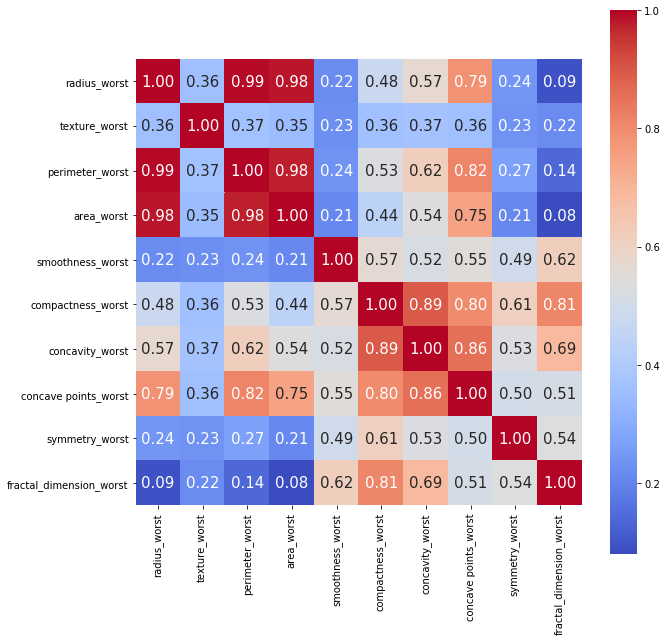

In [142]:
worstval= list(Cancerdata.columns[21:31]) # choose columns with worst value
corr = Cancerdata[worstval].corr(method='pearson') # .corr is used for find corelation
print(corr)
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= worstval, yticklabels= worstval,
           cmap= 'coolwarm') 

<font color = 'green'> Based on analysis above, we find that radius_worst, perimeter_worst, and area_worst are highly correlated with each other. So, from these, we choose just one feature for prediction and drop other two. Similarly, compactness_worst, concavity_worst, and concave points_worst are highly correlated with each other, hence we will choose just one prediction feature. On the other hand texture_worst, smoothness_worst, symmetry_worst, and fractal_dimension_worst has low correlation with all other features, so we will use all of them for prediction.

In [143]:
selected_features1= ['perimeter_worst','compactness_worst','texture_worst', 'smoothness_worst','symmetry_worst','fractal_dimension_worst']
selected_features2 = ['radius_worst','concavity_worst','texture_worst','smoothness_worst','symmetry_worst','fractal_dimension_worst']
selected_features3 = ['area_worst','concave points_worst','texture_worst','smoothness_worst','symmetry_worst','fractal_dimension_worst']
# create list for subset of selected features
selected_features = [selected_features1, selected_features2,selected_features3]

# <font color = 'green'> We will now experiment with 4 models and explore the model that predicts better outcome using three feature sets defined above. In the analysis below, we will run the model on all the three sets of features (selected_features1, selected_features2, selected_features3) defined above and observe its outcome on prediction accuracy. 

In [144]:
from sklearn.svm import SVC 
SVMmodel = SVC(kernel='rbf', gamma='auto',random_state= 0)

for i in selected_features:
    # Training data using selected features
    train_X = train[i]
    # repeat it for test data
    test_X= test[i] 
    #test_y =test.diagnosis 
    SVMmodel.fit(train_X,train_y) # now fit our model for traiing data
    SVMprediction=SVMmodel.predict(test_X)
    accuracy = []
    t = metrics.accuracy_score(SVMprediction,test_y).round(3)
    accuracy.append(t)    
    print(accuracy)

[0.924]
[0.936]
[0.614]


<font color ='green'>From analysis above, we can see that selected_features1 gives best prediction with SVM model, and worst is with selected_features3, which is in contrast with RandomForest model. 

In [145]:
from sklearn.tree import DecisionTreeClassifier
Treemodel = DecisionTreeClassifier(criterion='entropy', random_state= 0) # using entropy for Information Gain

for i in selected_features:
    # Training data using selected features
    train_X = train[i]
    # repeat it for test data
    test_X= test[i] 
    #test_y =test.diagnosis 
    Treemodel.fit(train_X,train_y) # now fit our model for traiing data
    Treeprediction=Treemodel.predict(test_X)
    accuracy = []
    t = metrics.accuracy_score(Treeprediction,test_y).round(3)
    accuracy.append(t)    
    print(accuracy)

[0.93]
[0.93]
[0.947]


In [146]:
from sklearn.linear_model import LogisticRegression
Logisticmodel = LogisticRegression( solver='lbfgs', max_iter=300, multi_class='ovr', random_state= 0)

for i in selected_features:
    # Training data using selected features
    train_X = train[i]
    # repeat it for test data
    test_X= test[i] 
    #test_y =test.diagnosis 
    Logisticmodel.fit(train_X,train_y) # now fit our model for traiing data
    Logisticprediction=Logisticmodel.predict(test_X)
    accuracy = []
    t = metrics.accuracy_score(Logisticprediction,test_y).round(3)
    accuracy.append(t)    
    print(accuracy)

[0.959]
[0.959]
[0.953]


In [147]:
from sklearn.ensemble import RandomForestClassifier # for random forest classifier

RFmodel=RandomForestClassifier(n_estimators=200, random_state= 0)# a simple random forest model

train_y=train.diagnosis
test_y =test.diagnosis 

for i in selected_features:
    # Training data using selected features
    train_X = train[i]
    # repeat it for test data
    test_X= test[i] 
    #test_y =test.diagnosis 
    RFmodel.fit(train_X,train_y)# now fit our model for traiing data
    prediction=RFmodel.predict(test_X)
    accuracy = []
    t = metrics.accuracy_score(prediction,test_y).round(3)
    accuracy.append(t)    
    print(accuracy)

[0.953]
[0.942]
[0.953]


<font color='green'>From analysis above, we can see that selected_features3 gives best prediction, and worst prediction is made with selected_features1.

# <font color = 'green'>Though the analysis was based on using a subset of features, from worst value columns, the analysis above shows that amongst SVM, Logistic Regression, Decision Tree, and RandomForest, we are getting better accuracy from LogisticRegression and RandomForest models.  

# <font color = 'green'> Using RandomForest, we will now explore the most important features, amongst all worst value columns, and reuse them for making predictions using RandomForest and Decision Tree models. 

In [148]:
#meanval = [Cancerdata.columns[1:11]] is set of all columns of the mean values
worstval

['radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [149]:
# Use all worst value columns as feature for model traning
train_y = train.diagnosis
test_y = test.diagnosis 
train_X = train[worstval]
test_X = test[worstval]

RFmodel.fit(train_X,train_y)# now fit our model for traiing data
prediction=RFmodel.predict(test_X)
accuracy = metrics.accuracy_score(prediction,test_y).round(3)  
print(accuracy)

0.947


In [150]:
# identify most important features using RandomForest model output
imp_features = pd.Series(RFmodel.feature_importances_, index=worstval).sort_values(ascending=False)
print(imp_features)
imp_features.index.tolist()

perimeter_worst            0.227375
concave points_worst       0.212544
area_worst                 0.201748
radius_worst               0.167602
concavity_worst            0.062855
compactness_worst          0.046046
smoothness_worst           0.028521
texture_worst              0.021096
symmetry_worst             0.019006
fractal_dimension_worst    0.013208
dtype: float64


['perimeter_worst',
 'concave points_worst',
 'area_worst',
 'radius_worst',
 'concavity_worst',
 'compactness_worst',
 'smoothness_worst',
 'texture_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [151]:
imp = imp_features.index.tolist()
imp

['perimeter_worst',
 'concave points_worst',
 'area_worst',
 'radius_worst',
 'concavity_worst',
 'compactness_worst',
 'smoothness_worst',
 'texture_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

# <font color= 'green'> Below, we will use important features to see if they improve prediction accuracy for both RandomForest and LogisticRegression models.

In [152]:
# Rerun Logistic model using important features

train_X = train[imp]
test_X = test[imp]

Logisticmodel = LogisticRegression(solver='lbfgs', max_iter=300, multi_class='ovr')

Logisticmodel.fit(train_X,train_y)# now fit our model for traiing data
prediction=Logisticmodel.predict(test_X)
accuracy = metrics.accuracy_score(prediction,test_y).round(3)  
print(accuracy)

0.965


In [153]:
# Rerun RandomForest model using important features
RFmodel=RandomForestClassifier(criterion = 'entropy',n_estimators=200)

RFmodel.fit(train_X,train_y)# now fit our model for traiing data
prediction=RFmodel.predict(test_X)
accuracy = metrics.accuracy_score(prediction,test_y).round(3)  
print(accuracy)

0.947


<font color ='green'> We can see that there is no impact on the accuracy of the models trained only using important features.

# <font color = 'green'> We will now experiment with hyperparameters and observe its impact on model performance.

In [154]:
"""
As part of hyperparameter change, we will change value for n_estimators (hyperparameter) and 
check its impact on prediction for RandomForest model
"""
est_range = [50.0, 100.0, 200.0,300.0, 400.0]

for i in est_range:
    RFmodel=RandomForestClassifier(n_estimators=int(i),random_state= 0)
    RFmodel.fit(train_X,train_y)
    prediction=RFmodel.predict(test_X)
    accuracy = []
    t = metrics.accuracy_score(prediction,test_y).round(3)
    accuracy.append(t)    
    print(accuracy)

[0.953]
[0.947]
[0.953]
[0.953]
[0.947]


In [155]:
"""
As part of hyperparameter change, we will change impurity from gini to entropy method and 
check its impact on prediction for RandomForest model.
"""
RFmodel=RandomForestClassifier(criterion = 'entropy', n_estimators=300,random_state= 0)
RFmodel.fit(train_X,train_y)
prediction=RFmodel.predict(test_X)
accuracy = metrics.accuracy_score(prediction,test_y).round(3)
print(accuracy)

0.953


<font color ='green'> From the above, we see that RandomForest is most accurate with either gini or entropy as impurity measure and with large n_estimator value.

In [156]:
"""
As part of hyperparameter change, we will change value for max_iter (hyperparameter) and 
check its impact on prediction accuracy of model.
"""
est_range = [100.0, 200.0,300.0, 400.0, 500.0, 600.0, 700.0, 800.0]

for i in est_range:
    Logisticmodel = LogisticRegression(solver='lbfgs', max_iter=int(i), multi_class='ovr',random_state= 0)
    RFmodel.fit(train_X,train_y)
    prediction=RFmodel.predict(test_X)
    accuracy = []
    t = metrics.accuracy_score(prediction,test_y).round(3)
    accuracy.append(t)    
    print(accuracy)

[0.953]
[0.953]
[0.953]
[0.953]
[0.953]
[0.953]
[0.953]
[0.953]


In [157]:
"""
As part of hyperparameter change, we will change solvers (hyperparameter) and 
check its impact on prediction accuracy of model.
"""
solvers = ['lbfgs', 'liblinear', 'sag', 'saga']

for i in solvers:
    Logisticmodel = LogisticRegression(solver=solvers, max_iter=300, multi_class='ovr',random_state= 0)
    RFmodel.fit(train_X,train_y)
    prediction=RFmodel.predict(test_X)
    accuracy = []
    t = metrics.accuracy_score(prediction,test_y).round(3)
    accuracy.append(t)    
    print(accuracy)

[0.953]
[0.953]
[0.953]
[0.953]


<font color ='green'> From the above, we see that Logistic regresion has very little impact on accuracy due to solver hyperparameter change.

In [158]:
'''
feature used are ['perimeter_worst',
 'concave points_worst',
 'radius_worst',
 'area_worst',
 'concavity_worst',
 'texture_worst',
 'compactness_worst',
 'smoothness_worst',
 'symmetry_worst',
 'fractal_dimension_worst']
'''

# final logistic model
Logisticmodel = LogisticRegression(solver='lbfgs', max_iter=300, multi_class='ovr',random_state= 0)

Logisticmodel.fit(train_X,train_y)# now fit our model for traiing data
LRprediction=Logisticmodel.predict(test_X)
Logistic_accuracy = metrics.accuracy_score(LRprediction,test_y).round(3)  


# final RandomForest model

RFmodel=RandomForestClassifier(criterion = 'gini',n_estimators=300,random_state= 0)

RFmodel.fit(train_X,train_y)# now fit our model for traiing data
RFprediction=RFmodel.predict(test_X)
RF_accuracy = metrics.accuracy_score(RFprediction,test_y).round(3)  

print(f'Accuracy of RandomForest model is {(RF_accuracy*100).round(3)} percent, and accuracy of Logistic Regression model is {(Logistic_accuracy*100).round(3)} percent.')


Accuracy of RandomForest model is 95.3 percent, and accuracy of Logistic Regression model is 96.5 percent.


<font color = 'green'> For better visualization, we will print the confusion matrix.

In [159]:
print(confusion_matrix(test_y,LRprediction))
print(classification_report(test_y,LRprediction))

[[99  1]
 [ 5 66]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       100
           1       0.99      0.93      0.96        71

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



<font color = 'green'> As we can see from the confusion matrix for Logistic regression model above, 6 cases are misclassified out of 171. Out of 6 misclassifed cases, 5 cases are false positive and 1 case is false negative. 

In [160]:
print(confusion_matrix(test_y,RFprediction))
print(classification_report(test_y,RFprediction))

[[99  1]
 [ 7 64]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       100
           1       0.98      0.90      0.94        71

    accuracy                           0.95       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



<font color = 'green'>As we can see from the confusion matrix for the Random forest model above, 8 cases are misclassified out of 171. Out of 8 misclassifed cases, 7 cases are false positive and 1 case is false negative. 

# <font color = 'green'> Conclusion: based on above the analyis, we can either use Logistic regression or RandomForest, as both model make approximately 95% accurate prediction. 